 # Tutorial : ECT for embedded graphs



 This jupyter notebook will walk you through using the `ect` package to compute the Euler characteristic transform of a 2D embedded graph. This tutorial assumes you already know what an ECT is; see [this paper](https://arxiv.org/abs/2310.10395) for a more thorough treatment of details.

In [1]:
from ect import ECT, EmbeddedGraph
from ect.utils.examples import create_example_graph

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx


 ## Constructing the embedded graph



 We assume our input is an undirected graph $G$ with an embedding in 2D given by a map on the vertices $f: V(G) \to \mathbb{R}^2$. A graph can be constructed as follows.



<Axes: >

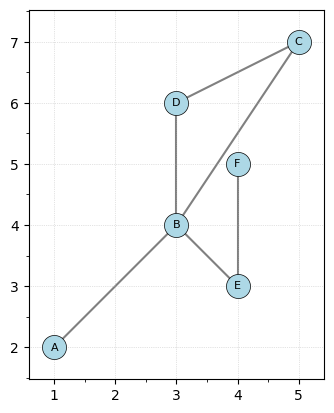

In [2]:
# Construct an example graph
# Note that this is the same graph that is returned by:
# G = create_example_graph()

G = EmbeddedGraph()

G.add_node("A", [1, 2])
G.add_node("B", [3, 4])
G.add_node("C", [5, 7])
G.add_node("D", [3, 6])
G.add_node("E", [4, 3])
G.add_node("F", [4, 5])

G.add_edge("A", "B")
G.add_edge("B", "C")
G.add_edge("B", "D")
G.add_edge("B", "E")
G.add_edge("C", "D")
G.add_edge("E", "F")

G.plot()



 The coordinates of all vertices, given as a dictionary, can be accessed using the `coord_matrix` attribute.

In [3]:
G.coord_matrix


array([[1., 2.],
       [3., 4.],
       [5., 7.],
       [3., 6.],
       [4., 3.],
       [4., 5.]])

 Because of the rotational aspect of the ECT, we often want our graph to be centered, so you can use the `center_coordinates` method shift the graph to have the average of the vertex coordinates be 0. Note that this does overwrite the coordinates of the points.

[[-2.33333333 -2.5       ]
 [-0.33333333 -0.5       ]
 [ 1.66666667  2.5       ]
 [-0.33333333  1.5       ]
 [ 0.66666667 -1.5       ]
 [ 0.66666667  0.5       ]]


<Axes: >

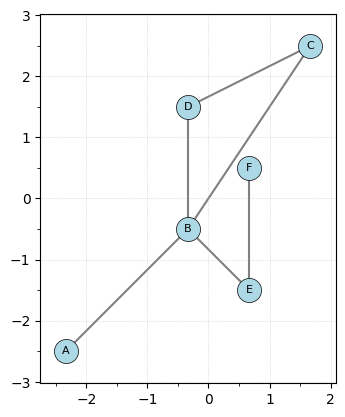

In [4]:
G.center_coordinates(center_type="mean")
print(G.coord_matrix)
G.plot()


 To get a bounding radius we can use the `get_bounding_radius` method.

The radius of bounding circle centered at the origin is 3.4197140881138655


<Axes: >

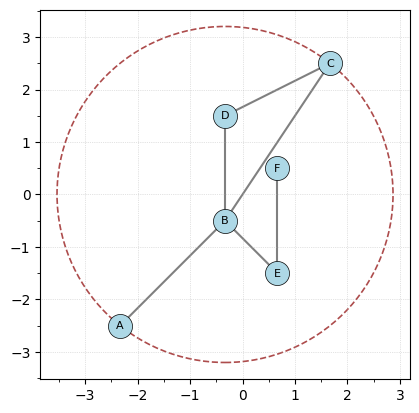

In [5]:
# This is actually getting the radius
r = G.get_bounding_radius()
print(f"The radius of bounding circle centered at the origin is {r}")

# plotting the graph with it's bounding circle of radius r.
G.plot(bounding_circle=True)



 We can also rescale our graph to have unit radius using `scale_coordinates`

The radius of bounding circle centered at the origin is 0.9999999999999998


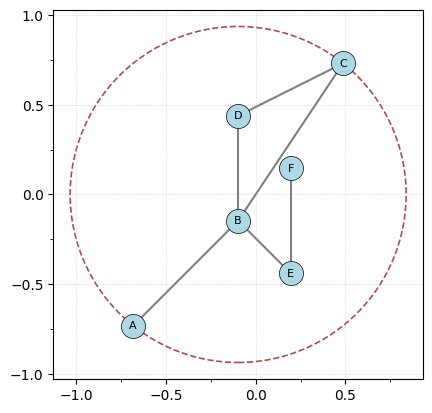

In [6]:
G.scale_coordinates(radius=1)
G.plot(bounding_circle=True)

r = G.get_bounding_radius()
print(f"The radius of bounding circle centered at the origin is {r}")



In [7]:
myect = ECT(num_dirs=16, num_thresh=20)

# The ECT object will automatically create directions when needed
print(f"Number of directions: {myect.num_dirs}")
print(f"Number of thresholds: {myect.num_thresh}")


Number of directions: 16
Number of thresholds: 20


 We can set the bounding radius as follows. Note that some methods will automatically use the bounding radius of the input `G` if not already set. I'm choosing the radius to be a bit bigger than the bounding radius of `G` to make some better pictures.

In [8]:
myect.set_bounding_radius(1.2 * G.get_bounding_radius())

print(f"Internally set radius is: {myect.bound_radius}")
print(f"Thresholds chosen are: {myect.thresholds}")


Internally set radius is: 1.1999999999999997
Thresholds chosen are: [-1.2        -1.07368421 -0.94736842 -0.82105263 -0.69473684 -0.56842105
 -0.44210526 -0.31578947 -0.18947368 -0.06315789  0.06315789  0.18947368
  0.31578947  0.44210526  0.56842105  0.69473684  0.82105263  0.94736842
  1.07368421  1.2       ]


 If we want the Euler characteristic curve for a fixed direction, we use the `calculate` function with a specific angle. This returns an ECTResult object containing the computed values.

In [9]:
result = myect.calculate(G, theta=np.pi / 2)
print(f"ECT values for direction pi/2: {result[0]}")


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


ECT values for direction pi/2: [0 0 0 0 1 1 1 2 2 1 1 1 1 1 1 1 0 0 0 0]


 To calculate the full ECT, we call the `calculate` method without specifying theta. The result returns the ECT matrix and associated metadata.

ECT matrix shape: (16, 20)
Number of directions: 16
Number of thresholds: 20


<Axes: xlabel='Direction $\\omega$ (radians)', ylabel='Threshold $a$'>

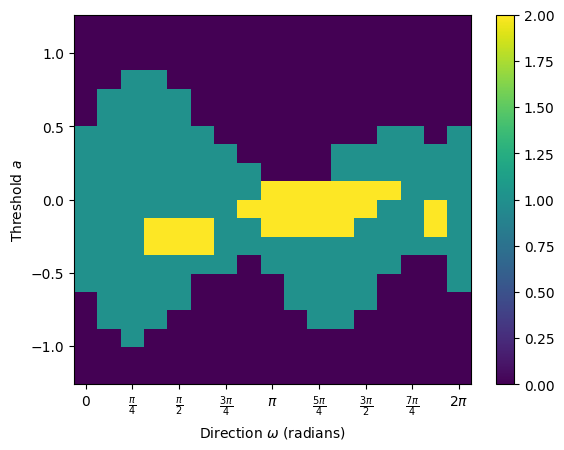

In [10]:
result = myect.calculate(G)

print(f"ECT matrix shape: {result.shape}")
print(f"Number of directions: {myect.num_dirs}")
print(f"Number of thresholds: {myect.num_thresh}")

# We can plot the result matrix
result.plot()


 ## SECT



 The Smooth Euler Characteristic Transform (SECT) can be calculated from the ECT. Fix a radius $R$ bounding the graph. The average ECT in a direction $\omega$ defined on function values $[-R,R]$ is given by

 $$\overline{\text{ECT}_\omega} = \frac{1}{2R} \int_{t = -R}^{R} \chi(g_\omega^{-1}(-\infty,t]) \; dt. $$

 Then the SECT is defined by

 $$

 \begin{matrix}

 \text{SECT}(G): & \mathbb{S}^1 & \to & \text{Func}(\mathbb{R}, \mathbb{Z})\\

 & \omega & \mapsto & \{ t \mapsto \int_{-R}^t \left( \chi(g_\omega^{-1}(-\infty,a]) -\overline{\text{ECT}_\omega}\right)\:da \}

 \end{matrix}

 $$

 The SECT can be computed from the ECT result:

<Axes: xlabel='Direction $\\omega$ (radians)', ylabel='Threshold $a$'>

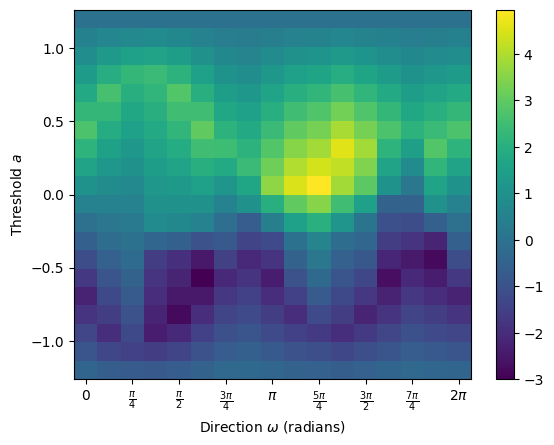

In [11]:
sect = result.smooth()

sect.plot()
